In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [7]:
df = pd.read_csv("data.csv")


In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  6


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [17]:
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [21]:
df.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


In [23]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [25]:
data=df.iloc[:,1:]

In [27]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


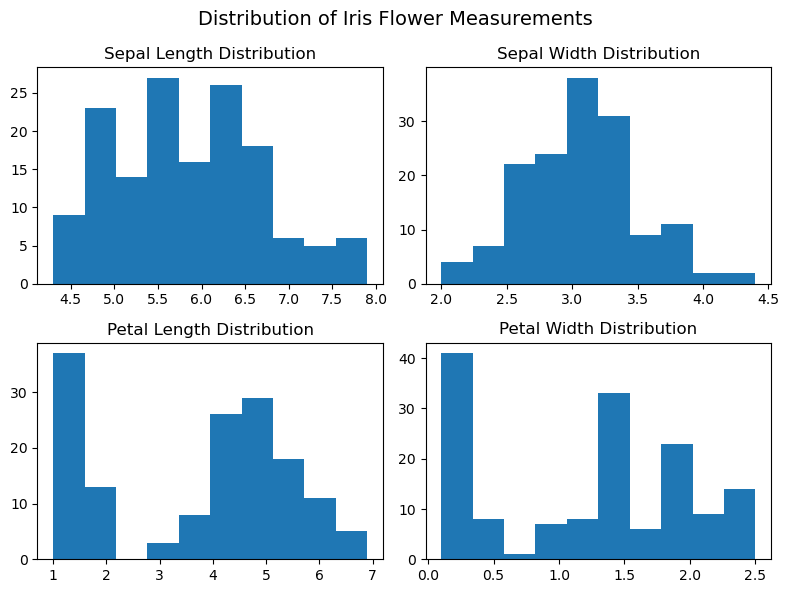

In [29]:
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

plt.subplot(2, 2, 1)  
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

plt.tight_layout()  
plt.show()


In [31]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

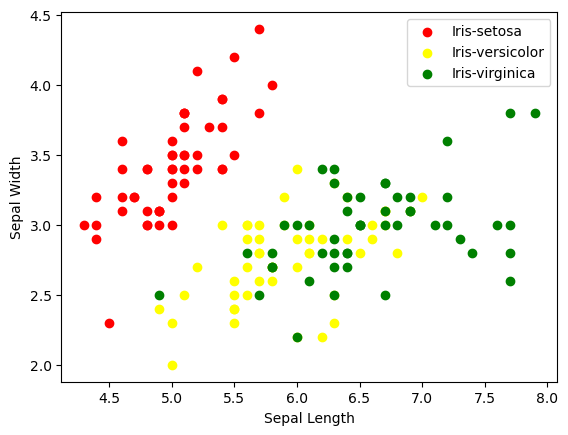

In [33]:
for i in range(3):
    x = data[data['Species'] == species[i]]

    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend()

plt.show()

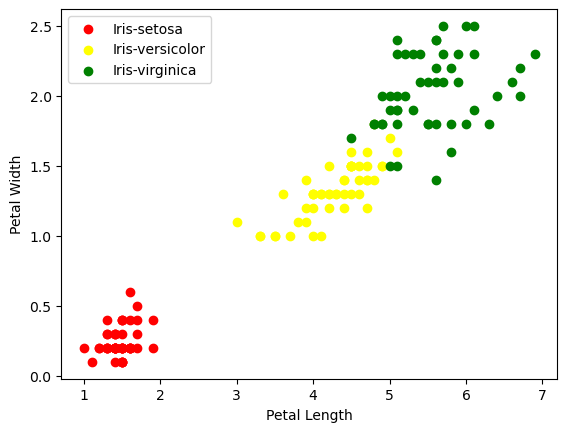

In [35]:
for i in range(3):
    x = data[data['Species'] == species[i]]

    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.legend()

plt.show()
     

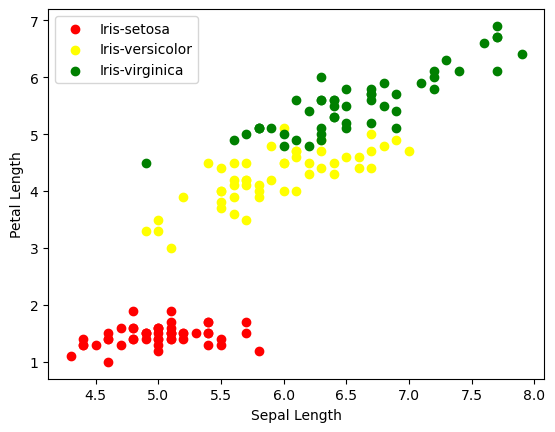

In [37]:
for i in range(3):
    x = data[data['Species'] == species[i]]

    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.legend()

plt.show()


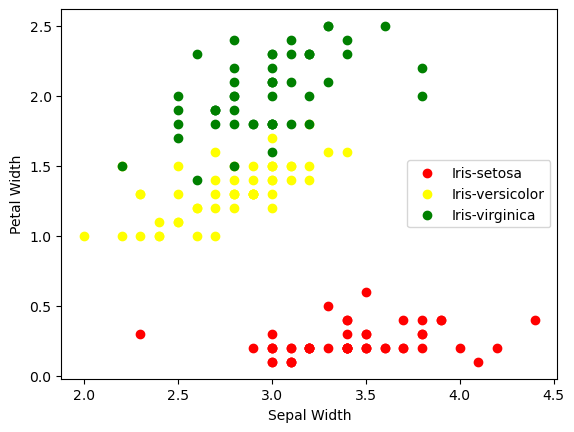

In [39]:
for i in range(3):
    x = data[data['Species'] == species[i]]

    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.legend()

plt.show()

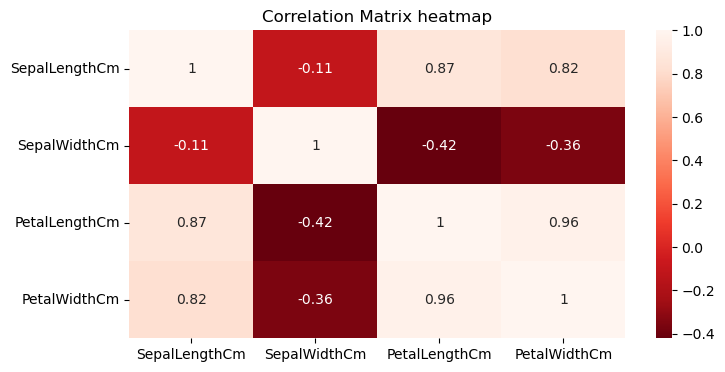

In [45]:

corr_matrix = data.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')


plt.title('Correlation Matrix heatmap')

plt.show()


In [47]:
le = LabelEncoder()

data['Species'] = le.fit_transform(data['Species'])

unique_species = data['Species'].unique()

print("Encoded Species Values:")
print(unique_species) 


Encoded Species Values:
[0 1 2]


In [49]:
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [53]:
y_train.value_counts()

Species
2    41
0    33
1    31
Name: count, dtype: int64

In [55]:
def evaluate_model(model, x_train, x_test, y_train, y_test):

    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [57]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

In [59]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Confusion Matrix:


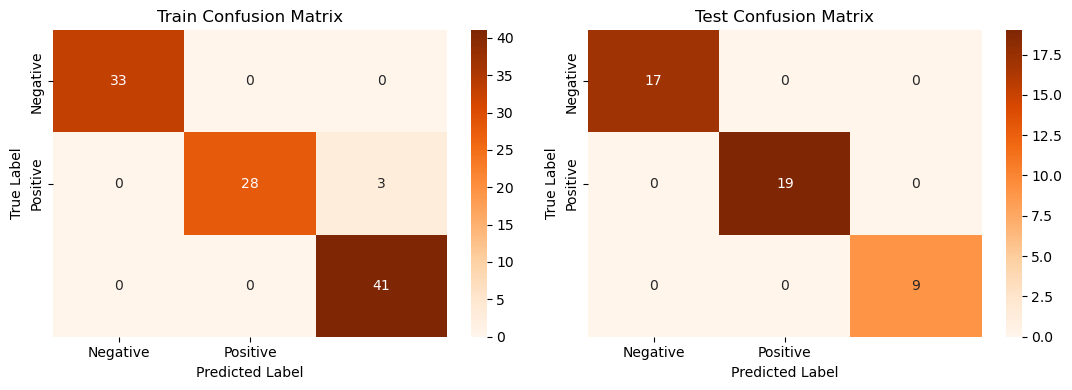


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    1        | 0.903226 |   0.949153 |  31        |
| 2            |    0.931818 | 1        |   0.964706 |  41        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.977273 | 0.967742 |   0.971286 | 105        |
| weighted avg |    0.973377 | 0.971429 |   0.971206 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        17 |
| 1            |           1 |        1 |          1 |        19 |
| 2            |           1 |        1 |          1 |         9 |
| accuracy     |           1 |        1 |          1 |        

In [61]:
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [63]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.973377
Precision Test,1.000000
Recall Train,0.971429
Recall Test,1.000000
Accuracy Train,0.971429
Accuracy Test,1.000000
F1 macro Train,0.971206
F1 macro Test,1.000000


In [65]:
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'sag'}


In [67]:
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


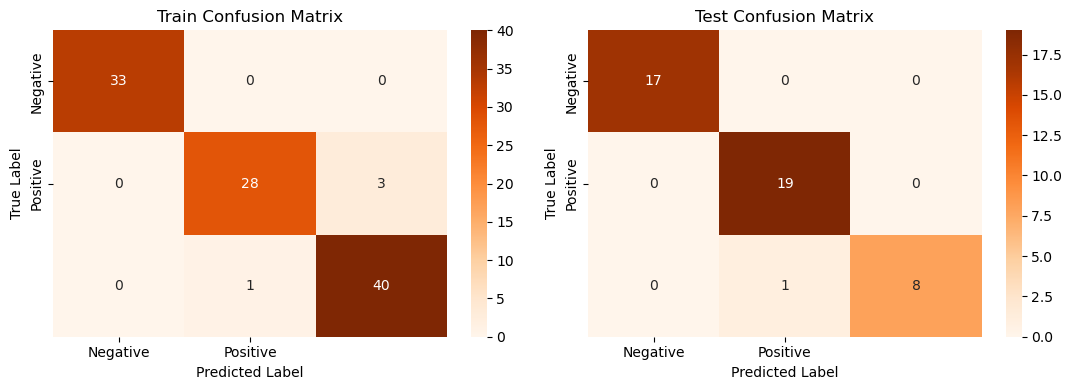


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.965517 | 0.903226 |   0.933333 |  31        |
| 2            |    0.930233 | 0.97561  |   0.952381 |  41        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.96525  | 0.959612 |   0.961905 | 105        |
| weighted avg |    0.962577 | 0.961905 |   0.961723 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    0.95     | 1        |   0.974359 | 19        |
| 2            |    1        | 0.888889 |   0.941176 |  9        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [69]:
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [75]:
score['Logistic regression tuned'] = lr_score2
score

,Logistic regression,Logistic regression tuned
Precision Train,0.973377,0.962577
Precision Test,1.000000,0.978889
Recall Train,0.971429,0.961905
Recall Test,1.000000,0.977778
Accuracy Train,0.971429,0.961905
Accuracy Test,1.000000,0.977778
F1 macro Train,0.971206,0.961723
F1 macro Test,1.000000,0.977409


In [77]:
dt_model = DecisionTreeClassifier(random_state=20)


Confusion Matrix:


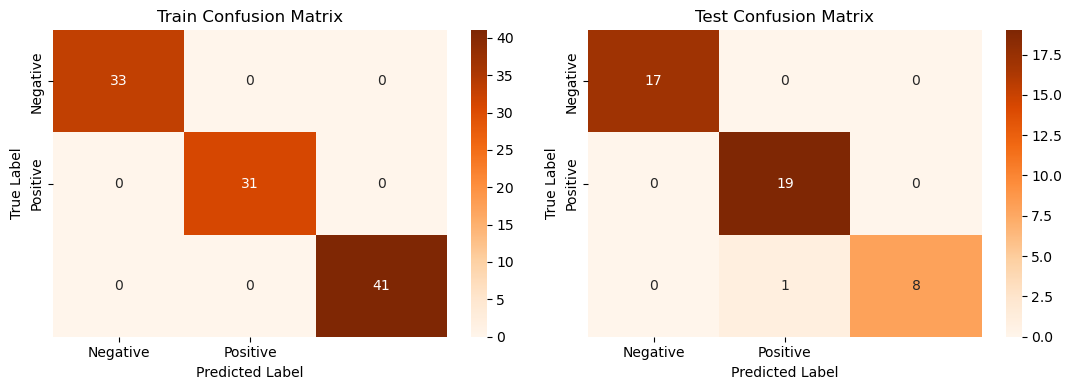


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        33 |
| 1            |           1 |        1 |          1 |        31 |
| 2            |           1 |        1 |          1 |        41 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    0.95     | 1        |   0.974359 | 19        |
| 2            |    1        | 0.888889 |   0.941176 |  9        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [79]:
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [81]:
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.973377,0.962577,1.000000
Precision Test,1.000000,0.978889,0.978889
Recall Train,0.971429,0.961905,1.000000
Recall Test,1.000000,0.977778,0.977778
Accuracy Train,0.971429,0.961905,1.000000
Accuracy Test,1.000000,0.977778,0.977778
F1 macro Train,0.971206,0.961723,1.000000
F1 macro Test,1.000000,0.977409,0.977409


In [83]:
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

model = DecisionTreeClassifier()

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

grid_search = GridSearchCV(model, grid, cv=rskf)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [85]:
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


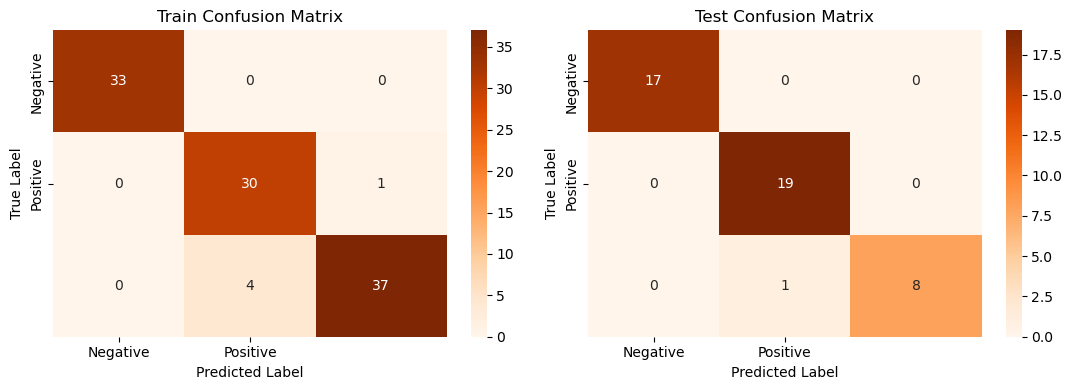


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.882353 | 0.967742 |   0.923077 |  31        |
| 2            |    0.973684 | 0.902439 |   0.936709 |  41        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.952012 | 0.956727 |   0.953262 | 105        |
| weighted avg |    0.95499  | 0.952381 |   0.952576 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    0.95     | 1        |   0.974359 | 19        |
| 2            |    1        | 0.888889 |   0.941176 |  9        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [87]:
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [89]:
score['Decision Tree tuned'] = dt2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.973377,0.962577,1.000000,0.954990
Precision Test,1.000000,0.978889,0.978889,0.978889
Recall Train,0.971429,0.961905,1.000000,0.952381
Recall Test,1.000000,0.977778,0.977778,0.977778
Accuracy Train,0.971429,0.961905,1.000000,0.952381
Accuracy Test,1.000000,0.977778,0.977778,0.977778
F1 macro Train,0.971206,0.961723,1.000000,0.952576
F1 macro Test,1.000000,0.977409,0.977409,0.977409


In [91]:
rf_model = RandomForestClassifier(random_state=0)


Confusion Matrix:


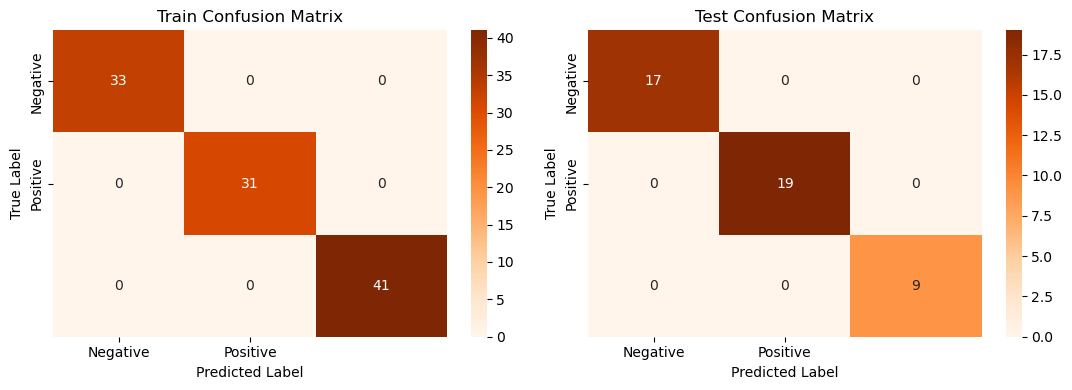


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        33 |
| 1            |           1 |        1 |          1 |        31 |
| 2            |           1 |        1 |          1 |        41 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        17 |
| 1            |           1 |        1 |          1 |        19 |
| 2            |           1 |        1 |          1 |         9 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

In [93]:
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [95]:
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.973377,0.962577,1.000000,0.954990,1.0
Precision Test,1.000000,0.978889,0.978889,0.978889,1.0
Recall Train,0.971429,0.961905,1.000000,0.952381,1.0
Recall Test,1.000000,0.977778,0.977778,0.977778,1.0
Accuracy Train,0.971429,0.961905,1.000000,0.952381,1.0
Accuracy Test,1.000000,0.977778,0.977778,0.977778,1.0
F1 macro Train,0.971206,0.961723,1.000000,0.952576,1.0
F1 macro Test,1.000000,0.977409,0.977409,0.977409,1.0


In [97]:
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

rf = RandomForestClassifier(random_state=0)

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 10, 'min_samples_split': 5, 'max_depth': 12}


In [99]:
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


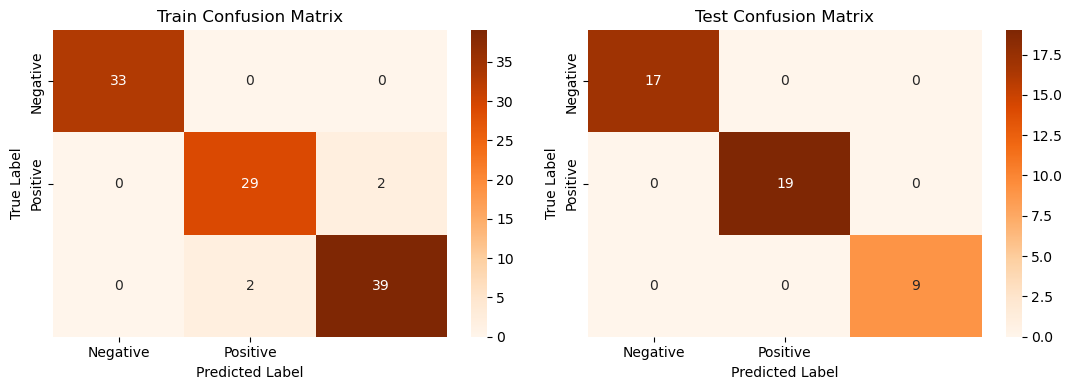


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.935484 | 0.935484 |   0.935484 |  31        |
| 2            |    0.95122  | 0.95122  |   0.95122  |  41        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.962234 | 0.962234 |   0.962234 | 105        |
| weighted avg |    0.961905 | 0.961905 |   0.961905 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        17 |
| 1            |           1 |        1 |          1 |        19 |
| 2            |           1 |        1 |          1 |         9 |
| accuracy     |           1 |        1 |          1 |        

In [101]:
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [103]:
score['Random Forest tuned'] = rf2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.973377,0.962577,1.000000,0.954990,1.0,0.961905
Precision Test,1.000000,0.978889,0.978889,0.978889,1.0,1.000000
Recall Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905
Recall Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000
Accuracy Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905
Accuracy Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000
F1 macro Train,0.971206,0.961723,1.000000,0.952576,1.0,0.961905
F1 macro Test,1.000000,0.977409,0.977409,0.977409,1.0,1.000000


In [105]:
svm_model = SVC(kernel='linear', random_state=0, probability=True)


Confusion Matrix:


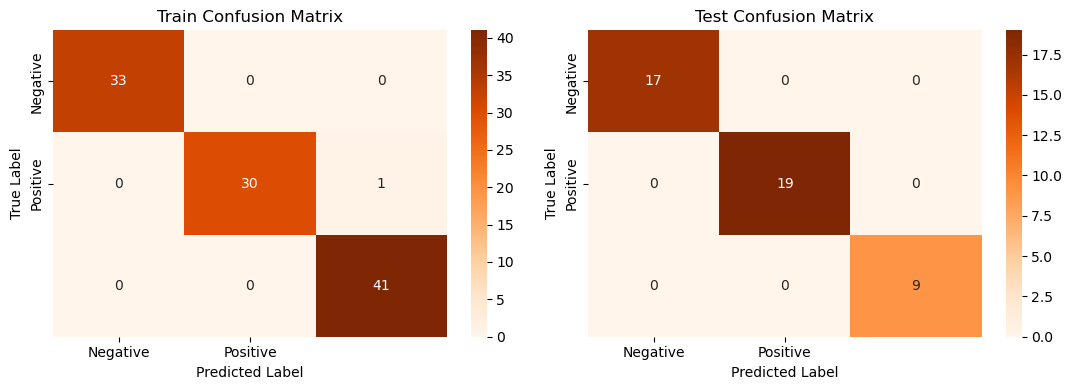


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    1        | 0.967742 |   0.983607 |  31        |
| 2            |    0.97619  | 1        |   0.987952 |  41        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.992063 | 0.989247 |   0.990519 | 105        |
| weighted avg |    0.990703 | 0.990476 |   0.990455 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        17 |
| 1            |           1 |        1 |          1 |        19 |
| 2            |           1 |        1 |          1 |         9 |
| accuracy     |           1 |        1 |          1 |        

In [107]:
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [109]:
score['SVM'] = svm_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.973377,0.962577,1.000000,0.954990,1.0,0.961905,0.990703
Precision Test,1.000000,0.978889,0.978889,0.978889,1.0,1.000000,1.000000
Recall Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476
Recall Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000
Accuracy Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476
Accuracy Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000
F1 macro Train,0.971206,0.961723,1.000000,0.952576,1.0,0.961905,0.990455
F1 macro Test,1.000000,0.977409,0.977409,0.977409,1.0,1.000000,1.000000


In [111]:
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

svm = SVC(random_state=0, probability=True)

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'linear', 'degree': 5, 'C': 3.2}


In [113]:
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


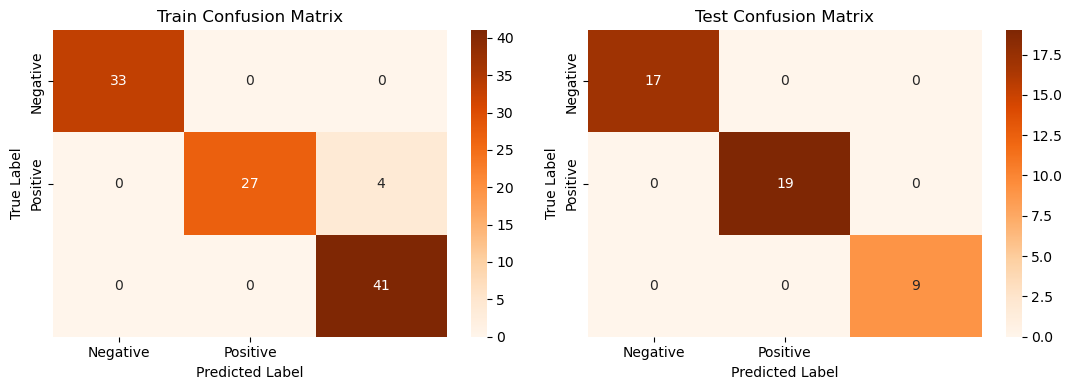


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    1        | 0.870968 |   0.931034 |  31        |
| 2            |    0.911111 | 1        |   0.953488 |  41        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.97037  | 0.956989 |   0.961508 | 105        |
| weighted avg |    0.965291 | 0.961905 |   0.961477 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        17 |
| 1            |           1 |        1 |          1 |        19 |
| 2            |           1 |        1 |          1 |         9 |
| accuracy     |           1 |        1 |          1 |        

In [115]:
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [119]:
score['SVM tuned'] = svm2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.973377,0.962577,1.000000,0.954990,1.0,0.961905,0.990703,0.965291
Precision Test,1.000000,0.978889,0.978889,0.978889,1.0,1.000000,1.000000,1.000000
Recall Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905
Recall Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000
Accuracy Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905
Accuracy Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000
F1 macro Train,0.971206,0.961723,1.000000,0.952576,1.0,0.961905,0.990455,0.961477
F1 macro Test,1.000000,0.977409,0.977409,0.977409,1.0,1.000000,1.000000,1.000000


In [121]:
xgb_model = xgb.XGBClassifier()


Confusion Matrix:


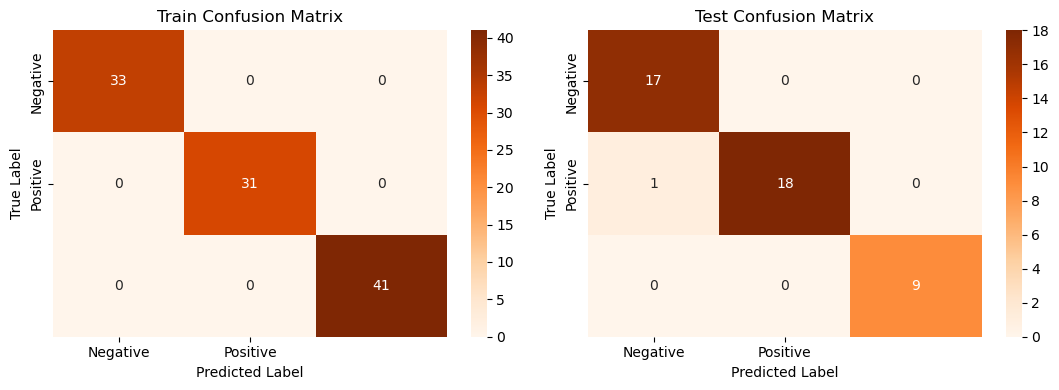


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        33 |
| 1            |           1 |        1 |          1 |        31 |
| 2            |           1 |        1 |          1 |        41 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.944444 | 1        |   0.971429 | 17        |
| 1            |    1        | 0.947368 |   0.972973 | 19        |
| 2            |    1        | 1        |   1        |  9        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [123]:
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [125]:
score['XGB'] = xgb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.973377,0.962577,1.000000,0.954990,1.0,0.961905,0.990703,0.965291,1.000000
Precision Test,1.000000,0.978889,0.978889,0.978889,1.0,1.000000,1.000000,1.000000,0.979012
Recall Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905,1.000000
Recall Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000,0.977778
Accuracy Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905,1.000000
Accuracy Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000,0.977778
F1 macro Train,0.971206,0.961723,1.000000,0.952576,1.0,0.961905,0.990455,0.961477,1.000000
F1 macro Test,1.000000,0.977409,0.977409,0.977409,1.0,1.000000,1.000000,1.000000,0.977795


In [127]:
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

xgb2 = xgb.XGBClassifier(random_state=0)

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.01}


In [129]:
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Confusion Matrix:


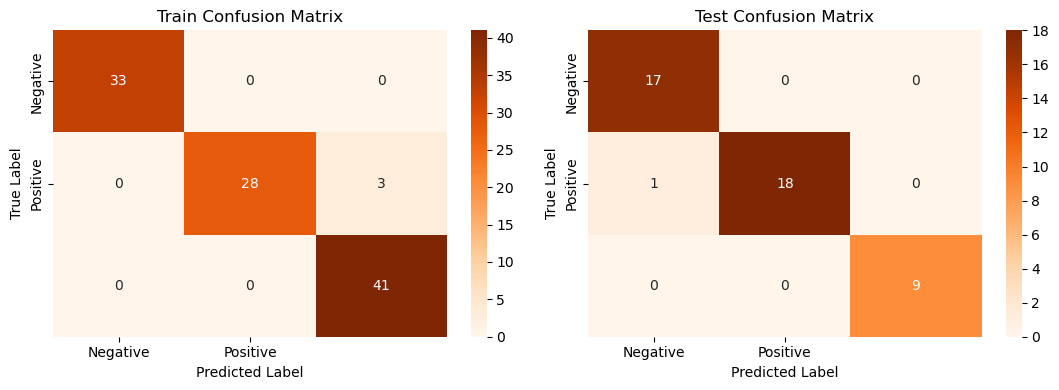


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    1        | 0.903226 |   0.949153 |  31        |
| 2            |    0.931818 | 1        |   0.964706 |  41        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.977273 | 0.967742 |   0.971286 | 105        |
| weighted avg |    0.973377 | 0.971429 |   0.971206 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.944444 | 1        |   0.971429 | 17        |
| 1            |    1        | 0.947368 |   0.972973 | 19        |
| 2            |    1        | 1        |   1        |  9        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [131]:
xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [133]:
score['XGB tuned'] = xgb2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned
Precision Train,0.973377,0.962577,1.000000,0.954990,1.0,0.961905,0.990703,0.965291,1.000000,0.973377
Precision Test,1.000000,0.978889,0.978889,0.978889,1.0,1.000000,1.000000,1.000000,0.979012,0.979012
Recall Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905,1.000000,0.971429
Recall Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000,0.977778,0.977778
Accuracy Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905,1.000000,0.971429
Accuracy Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000,0.977778,0.977778
F1 macro Train,0.971206,0.961723,1.000000,0.952576,1.0,0.961905,0.990455,0.961477,1.000000,0.971206
F1 macro Test,1.000000,0.977409,0.977409,0.977409,1.0,1.000000,1.000000,1.000000,0.977795,0.977795


In [135]:
nb_model = GaussianNB()


Confusion Matrix:


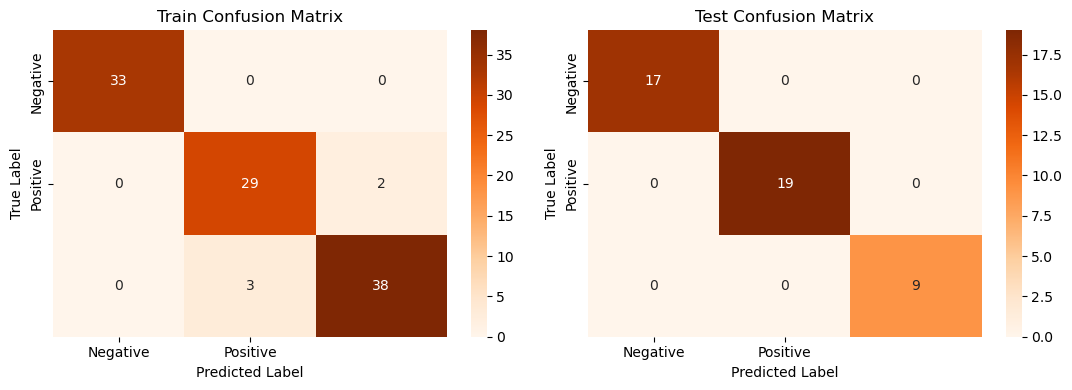


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.90625  | 0.935484 |   0.920635 |  31        |
| 2            |    0.95     | 0.926829 |   0.938272 |  41        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.952083 | 0.954104 |   0.952969 | 105        |
| weighted avg |    0.952798 | 0.952381 |   0.952465 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        17 |
| 1            |           1 |        1 |          1 |        19 |
| 2            |           1 |        1 |          1 |         9 |
| accuracy     |           1 |        1 |          1 |        

In [137]:
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [139]:
score['Naive Bayes'] = nb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes
Precision Train,0.973377,0.962577,1.000000,0.954990,1.0,0.961905,0.990703,0.965291,1.000000,0.973377,0.952798
Precision Test,1.000000,0.978889,0.978889,0.978889,1.0,1.000000,1.000000,1.000000,0.979012,0.979012,1.000000
Recall Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905,1.000000,0.971429,0.952381
Recall Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000,0.977778,0.977778,1.000000
Accuracy Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905,1.000000,0.971429,0.952381
Accuracy Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000,0.977778,0.977778,1.000000
F1 macro Train,0.971206,0.961723,1.000000,0.952576,1.0,0.961905,0.990455,0.961477,1.000000,0.971206,0.952465
F1 macro Test,1.000000,0.977409,0.977409,0.977409,1.0,1.000000,1.000000,1.000000,0.977795,0.977795,1.000000


In [141]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

naive = GaussianNB()

rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

GridSearch.fit(x_train, y_train)

best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)


Best hyperparameters:  {'var_smoothing': 0.004328761281083057}


In [143]:
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


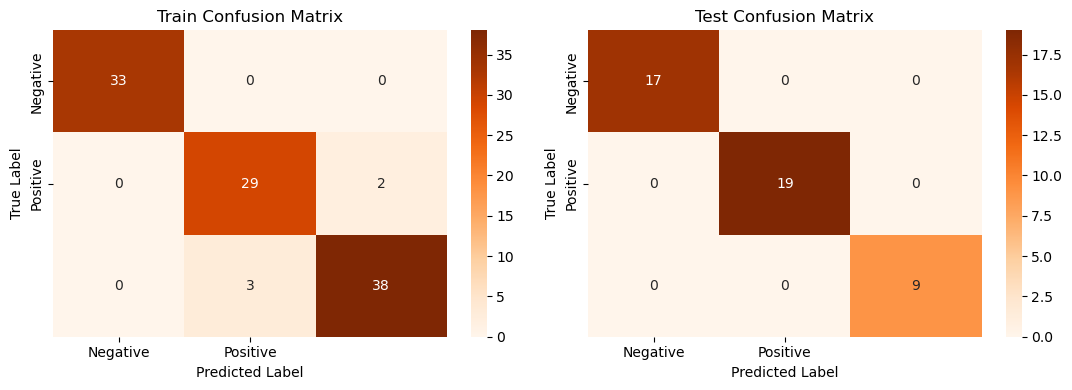


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.90625  | 0.935484 |   0.920635 |  31        |
| 2            |    0.95     | 0.926829 |   0.938272 |  41        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.952083 | 0.954104 |   0.952969 | 105        |
| weighted avg |    0.952798 | 0.952381 |   0.952465 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        17 |
| 1            |           1 |        1 |          1 |        19 |
| 2            |           1 |        1 |          1 |         9 |
| accuracy     |           1 |        1 |          1 |        

In [145]:
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [149]:
score['Naive Bayes tuned']= nb2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.973377,0.962577,1.000000,0.954990,1.0,0.961905,0.990703,0.965291,1.000000,0.973377,0.952798,0.952798
Precision Test,1.000000,0.978889,0.978889,0.978889,1.0,1.000000,1.000000,1.000000,0.979012,0.979012,1.000000,1.000000
Recall Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905,1.000000,0.971429,0.952381,0.952381
Recall Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000,0.977778,0.977778,1.000000,1.000000
Accuracy Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905,1.000000,0.971429,0.952381,0.952381
Accuracy Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000,0.977778,0.977778,1.000000,1.000000
F1 macro Train,0.971206,0.961723,1.000000,0.952576,1.0,0.961905,0.990455,0.961477,1.000000,0.971206,0.952465,0.952465
F1 macro Test,1.000000,0.977409,0.977409,0.977409,1.0,1.000000,1.000000,1.000000,0.977795,0.977795,1.000000,1.000000


In [151]:
nn_model = MLPClassifier(random_state=0)


Confusion Matrix:


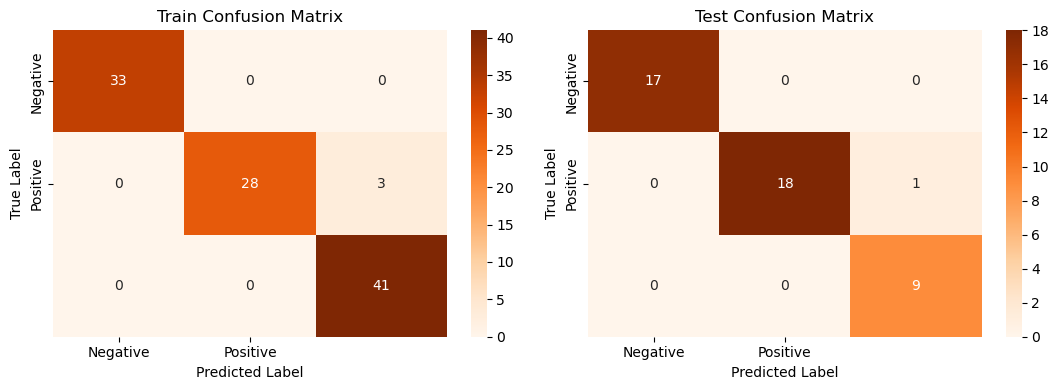


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    1        | 0.903226 |   0.949153 |  31        |
| 2            |    0.931818 | 1        |   0.964706 |  41        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.977273 | 0.967742 |   0.971286 | 105        |
| weighted avg |    0.973377 | 0.971429 |   0.971206 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    1        | 0.947368 |   0.972973 | 19        |
| 2            |    0.9      | 1        |   0.947368 |  9        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [153]:
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [155]:
score['Neural Network'] = neural_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.973377,0.962577,1.000000,0.954990,1.0,0.961905,0.990703,0.965291,1.000000,0.973377,0.952798,0.952798,0.973377
Precision Test,1.000000,0.978889,0.978889,0.978889,1.0,1.000000,1.000000,1.000000,0.979012,0.979012,1.000000,1.000000,0.980000
Recall Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905,1.000000,0.971429,0.952381,0.952381,0.971429
Recall Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000,0.977778,0.977778,1.000000,1.000000,0.977778
Accuracy Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905,1.000000,0.971429,0.952381,0.952381,0.971429
Accuracy Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000,0.977778,0.977778,1.000000,1.000000,0.977778
F1 macro Train,0.971206,0.961723,1.000000,0.952576,1.0,0.961905,0.990455,0.961477,1.000000,0.971206,0.952465,0.952465,0.971206
F1 macro Test,1.000000,0.977409,0.977409,0.977409,1.0,1.000000,1.000000,1.000000,0.977795,0.977795,1.000000,1.000000,0.978062


In [157]:
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

neural = MLPClassifier(random_state=0)

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)


Best hyperparameters:  {'hidden_layer_sizes': 70, 'alpha': 0.0005}


In [159]:
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Confusion Matrix:


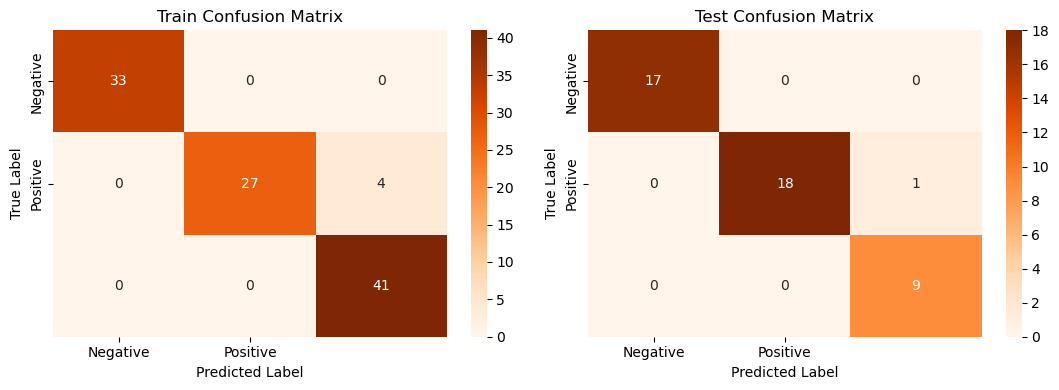


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    1        | 0.870968 |   0.931034 |  31        |
| 2            |    0.911111 | 1        |   0.953488 |  41        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.97037  | 0.956989 |   0.961508 | 105        |
| weighted avg |    0.965291 | 0.961905 |   0.961477 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    1        | 0.947368 |   0.972973 | 19        |
| 2            |    0.9      | 1        |   0.947368 |  9        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [161]:
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [163]:
score['Neural Network tuned']= neural2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.973377,0.962577,1.000000,0.954990,1.0,0.961905,0.990703,0.965291,1.000000,0.973377,0.952798,0.952798,0.973377,0.965291
Precision Test,1.000000,0.978889,0.978889,0.978889,1.0,1.000000,1.000000,1.000000,0.979012,0.979012,1.000000,1.000000,0.980000,0.980000
Recall Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905,1.000000,0.971429,0.952381,0.952381,0.971429,0.961905
Recall Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000,0.977778,0.977778,1.000000,1.000000,0.977778,0.977778
Accuracy Train,0.971429,0.961905,1.000000,0.952381,1.0,0.961905,0.990476,0.961905,1.000000,0.971429,0.952381,0.952381,0.971429,0.961905
Accuracy Test,1.000000,0.977778,0.977778,0.977778,1.0,1.000000,1.000000,1.000000,0.977778,0.977778,1.000000,1.000000,0.977778,0.977778
F1 macro Train,0.971206,0.961723,1.000000,0.952576,1.0,0.961905,0.990455,0.961477,1.000000,0.971206,0.952465,0.952465,0.971206,0.961477
F1 macro Test,1.000000,0.977409,0.977409,0.977409,1.0,1.000000,1.000000,1.000000,0.977795,0.977795,1.000000,1.000000,0.978062,0.978062


In [165]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.973377 |                    0.962577 |        1        |              0.95499  |               1 |              0.961905 | 0.990703 |    0.965291 | 1        |    0.973377 |      0.952798 |            0.952798 |         0.973377 |               0.965291 |
| Precision Test  |              1        |                    0.978889 |        0.978889 |              0.978889 |               

In [167]:
score_t = score.transpose()            
remove_models = score_t[score_t['Recall Train']>=0.98].index  
remove_models

adj = score_t.drop(remove_models)                     
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic regression,0.973377,1.000000,0.971429,1.000000,0.971429,1.000000,0.971206,1.000000
Logistic regression tuned,0.962577,0.978889,0.961905,0.977778,0.961905,0.977778,0.961723,0.977409
Decision Tree tuned,0.954990,0.978889,0.952381,0.977778,0.952381,0.977778,0.952576,0.977409
Random Forest tuned,0.961905,1.000000,0.961905,1.000000,0.961905,1.000000,0.961905,1.000000
SVM tuned,0.965291,1.000000,0.961905,1.000000,0.961905,1.000000,0.961477,1.000000
XGB tuned,0.973377,0.979012,0.971429,0.977778,0.971429,0.977778,0.971206,0.977795
Naive Bayes,0.952798,1.000000,0.952381,1.000000,0.952381,1.000000,0.952465,1.000000
Naive Bayes tuned,0.952798,1.000000,0.952381,1.000000,0.952381,1.000000,0.952465,1.000000
Neural Network,0.973377,0.980000,0.971429,0.977778,0.971429,0.977778,0.971206,0.978062
Neural Network tuned,0.965291,0.980000,0.961905,0.977778,0.961905,0.977778,0.961477,0.978062


In [169]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [171]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Logistic regression - 1.0
Recall: Logistic regression - 1.0
Accuracy: Logistic regression - 1.0
F1 macro: Logistic regression - 1.0


In [173]:
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model      |   Recall Train |   Recall Test |
|:--------------------------|---------------:|--------------:|
| Logistic regression       |       0.971429 |      1        |
| Logistic regression tuned |       0.961905 |      0.977778 |
| Decision Tree tuned       |       0.952381 |      0.977778 |
| Random Forest tuned       |       0.961905 |      1        |
| SVM tuned                 |       0.961905 |      1        |
| XGB tuned                 |       0.971429 |      0.977778 |
| Naive Bayes               |       0.952381 |      1        |
| Naive Bayes tuned         |       0.952381 |      1        |
| Neural Network            |       0.971429 |      0.977778 |
| Neural Network tuned      |       0.961905 |      0.977778 |


In [175]:
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [177]:
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])

x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa
